In [10]:
### This script draw Venn-diagram and heatmap in Figure 3
import pandas as pd
import pickle, os
from collections import Counter
import numpy as np
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [14]:
### Generate the label dictionary
dir_cohort = '../anno_ref/cohorts'
feature_type = 'histology'
df_feat = pd.read_csv(os.path.join(dir_cohort,feature_type+'.csv'))
dict_feat_np = dict(Counter(df_feat[feature_type]))
dict_feat_np = {k: v for k, v in sorted(dict_feat_np.items(), key=lambda item: item[1])}

***
### Venn Diagram

In [12]:
import matplotlib.pyplot as plt
### This script draw Venn-diagram and heatmap in Figure 3
import pandas as pd
import pickle, os
from collections import Counter
import numpy as np
from matplotlib_venn import venn3, venn3_circles
import seaborn as sns


In [17]:
dir_in = '../manuscript/figures_data/'
dict_venn = pickle.load(open(os.path.join(dir_in, 'dict_venn.pkl'),'rb'))
df_nsyn = pd.read_csv(os.path.join(dir_in,'nsyn_forheatmap.csv'),index_col = 0)

In [300]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from matplotlib import gridspec
from matplotlib_venn import venn3, venn3_circles
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'lines.linewidth':4,
         'font.sans-serif':'Ariel',
         'font.weight':'bold',
          'font.size':10}
# font = {'fontname':'monospace', 'size':'15'}
pylab.rcParams.update(params)

***Venn Diagrams***

In [3]:
def draw_venn(idx, annotation):
    fig, axs = plt.subplots(figsize = (5,5))

    v = venn3(subsets = dict_venn['size'] , \
              set_labels = ('Cancer Gene Census', 'MutSigCVsyn-\nnonsynonymous', 'PCAWG driver list'),\
             alpha = 0.2)
    v.get_patch_by_id(idx).set_alpha(1.0)
    v.get_patch_by_id(idx).set_color('white')
    # v.get_label_by_id('111').set_text('PCAWG & CGC')
    # Set label position
    for text in v.set_labels:
        if text.get_text() == 'PCAWG driver list':
            x = text.get_position()[0]+0.15
            y = text.get_position()[1]-0.2
            text.set_position((x,y))

    c = venn3_circles(subsets=dict_venn['size'], linestyle='dashed')
    c[1].set_lw(1.0)
    c[1].set_ls('dotted')
    plt.annotate(annotation, xy=v.get_label_by_id(idx).get_position() - np.array([0, 0.02]), xytext=(-170,-70),
                 ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',color='grey'))
    
    plt.tight_layout()
    plt.show()

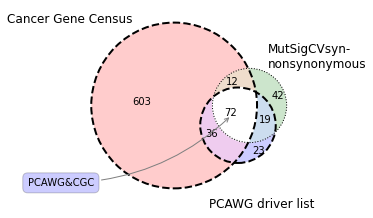

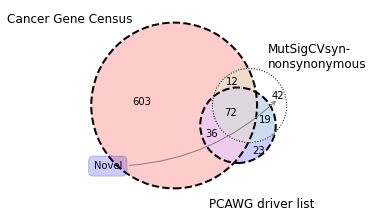

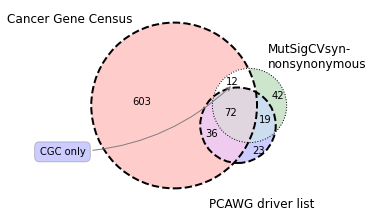

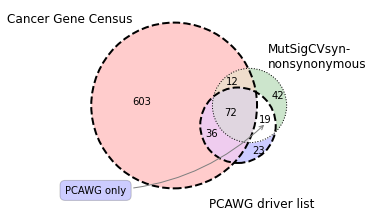

In [4]:
draw_venn('111','PCAWG&CGC')
draw_venn('010','Novel')
draw_venn('110','CGC only')
draw_venn('011','PCAWG only')

***Heatmap function***

In [5]:
def draw_heatmap(df):
    fig, ax = plt.subplots(figsize = (len(df.columns)/2,len(df)/2))
    
    cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
    ax = sns.heatmap(df,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.3})
    ax.set_ylabel('Significant Genes'); ax.set_xlabel('Histology Cohort')
    # add patient number to ticks
    labels=[]
    for label in ax.get_yticklabels():
        feat = label.get_text()
        new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
        labels.append(new_label)
        label.set_ha("right")
    ax.set_yticklabels(labels)
#     ax.tick_params(axis='x', which='major', labelbottom = True, \
#                    bottom=False, top = False, labeltop=False,rotation = 90)
    plt.tight_layout()
    plt.show()
    # plt.savefig(os.path.join(dir_out,'venn_diagram_nsyn.pdf'))

In [ ]:
draw_heatmap(df_pivot_novel.transpose(), 14)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


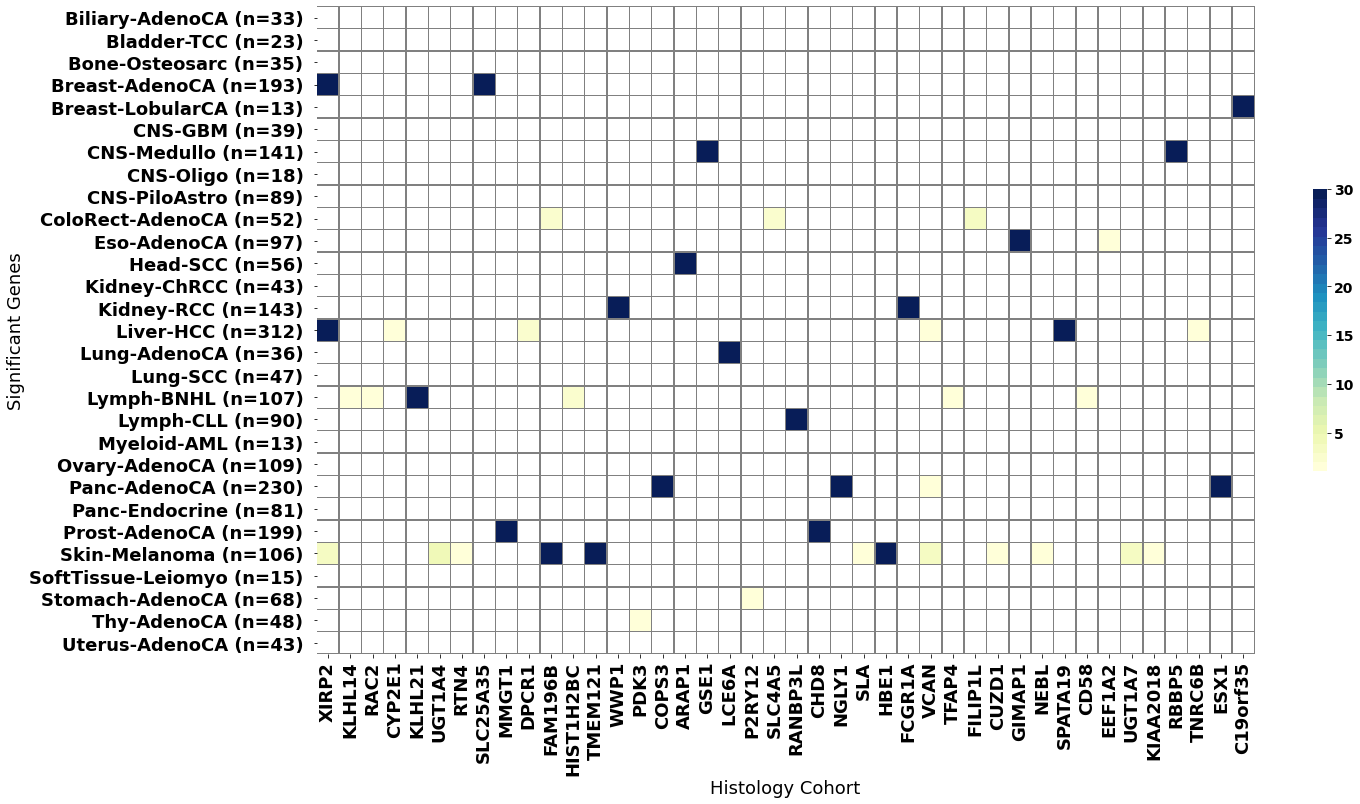

In [18]:
draw_heatmap(dict_venn['novel'].transpose(), 14)

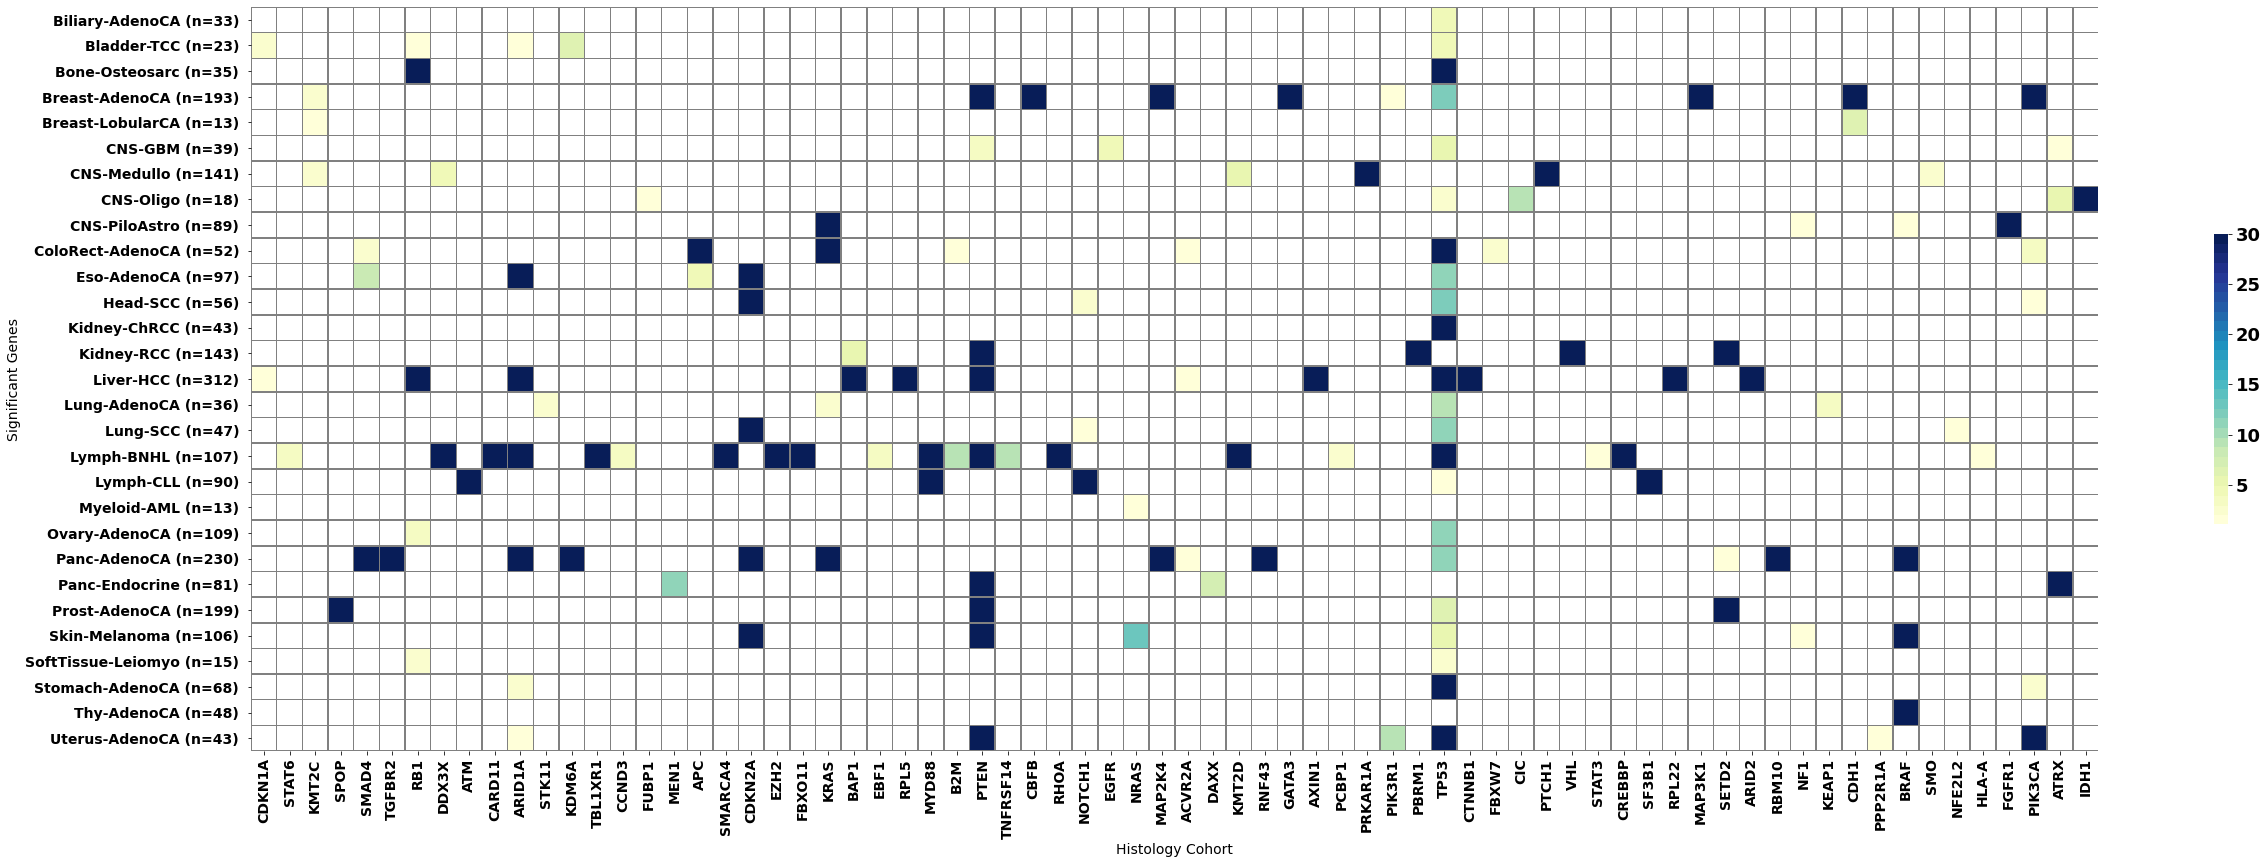

In [19]:
draw_heatmap(dict_venn['cgc_pcawg'].transpose(),18)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


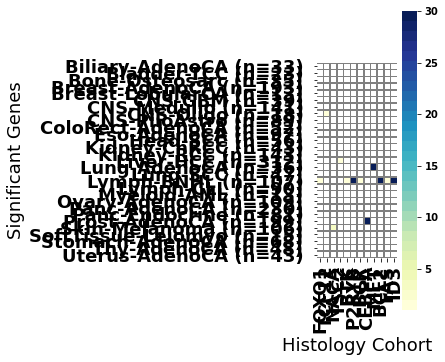

In [20]:
draw_heatmap(dict_venn['cgc_only'].transpose(),10)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


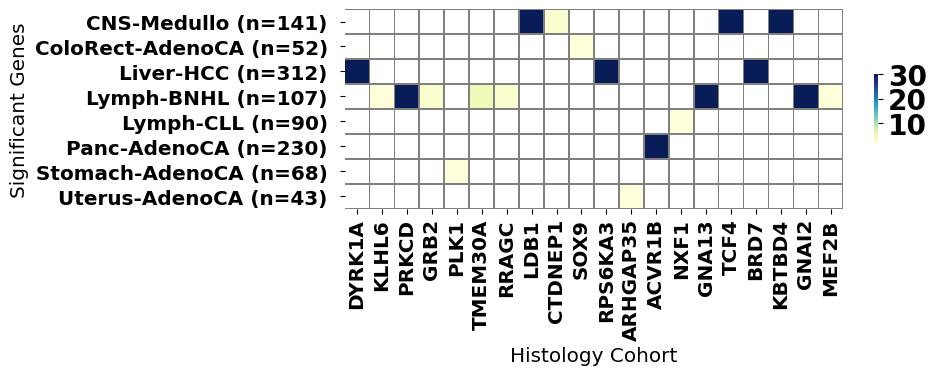

In [309]:
draw_heatmap(df_pivot_pcawg_only.transpose(),14)